# 모듈 설치하기

### 먼저 이 프로젝트를 실행하기 위한 모듈을 설치해야합니다!

___
### 모듈을 설치하기위해 다음 명령어를 anaconda에서 실행하십시오

- pip install opencv-python
- pip install numpy
- pip install matplotlib
- pip install pytesseract
- conda install -c conda-forge tesseract

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import matplotlib.image as mpimg

## 이미지 불러오기

#### opencv의 이미지( RGB)를 GRAY로 바꿔줍니다.

- 보통 opencv에서 이미지는 BGR로 저장되기 때문에 RGB로 바꿔줘야 합니다.
- "test/test_apple.jpg"는 이미지가 담겨있는 경로 이므로 이대로 시작하면 실행되지 않습니다.
- 컴퓨터의 존재하는 다른 이미지의 경로로 설정해주십시오.

In [2]:
#이미지를 RGB로 받았습니다.
img_color = cv2.imread("test_apple.jpg", cv2.COLOR_BGR2RGB)

## 이미지를 불러와 hsv파일로 변환하기
___
#### 이번 코드에선 hsv를 이용해 글자만 분리해야하기 때문에 이미지를 hsv형식으로 바꾸어보겠습니다.

In [3]:
img_gray = cv2.bitwise_not(img_color)
#hsv로 변환합니다.
img_hsv = cv2.cvtColor(img_gray, cv2.COLOR_BGR2HSV)

## 원하는 색상만 분리하기 위해서 hsv범위를 설정하고 마스크를 씌움
---
#### 검은색인 글씨만 추출하기위해 hsv범위를 설정합니다.
- 설정한 범위 밖의 색깔을 무시합니다.
- 인식할 범위의 최소와 최대를 입력합니다.

In [4]:
# 색상 범위 설정
lower_black = (0, 0, 175)
upper_black = (180, 255, 255)

#제한한 색상범위로 mask를 만듦니다.
img_mask = cv2.inRange(img_hsv, lower_black, upper_black)

img_result = cv2.bitwise_and(img_gray, img_gray, mask=img_mask)

## 마스크를 씌운 최종 이미지를 출력합니다.

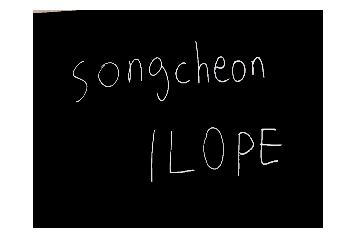

In [5]:
# 결과 이미지를 만들고 출력합니다.
img_result = cv2.resize(img_result, dsize=(1200, 900), interpolation=cv2.INTER_LINEAR)
imgplot = plt.imshow(img_result)
plt.axis('off')
plt.show()

## 최종 이미지 중 '영어'를 찾아 출력합니다.
---
> 인식이 잘 되지 않을 경우 색상 범위를 재설정 해주세요.

- 현재 인식률이 낮아 수정중입니다 ㅠ

In [6]:
text = pytesseract.image_to_string(img_result,lang='eng')
print(text)

ll

S oNngcheon

atlas
